# Importing libaries

In [519]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

In [2]:
finance = pd.read_excel('main.xls')

In [3]:
finance

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Dominican Rep.,243,"Use of Financial Services, Number of Borrowers...",FCRODC_PE_NUM,Value,NaN,NaN,7.188890e+05,8.056580e+05,8.548020e+05,...,9.167750e+05,9.939160e+05,9.297040e+05,1.044209e+06,1.158826e+06,1.311688e+06,1.429150e+06,1.452144e+06,1.463007e+06,1.612326e+06
1,"Egypt, Arab Rep. of",469,"Use of Financial Services, Number of Borrowers...",FCRODC_PE_NUM,Value,NaN,1.951917e+06,1.933118e+06,2.731376e+06,3.643602e+06,...,4.352049e+06,4.405484e+06,4.528931e+06,6.283838e+06,6.049674e+06,6.247766e+06,6.783294e+06,6.612612e+06,7.617438e+06,8.203553e+06
2,"Equatorial Guinea, Rep. of",642,"Use of Financial Services, Number of Borrowers...",FCRODC_PE_NUM,Value,9.680000e+02,1.566000e+03,1.922000e+03,2.491000e+03,2.845000e+03,...,4.046000e+03,4.497000e+03,5.387000e+03,6.315000e+03,8.050000e+03,1.377300e+04,1.663900e+04,2.181700e+04,2.711200e+04,3.383900e+04
3,Togo,742,"Use of Financial Services, Assets: Outstanding...",FCSODC_XDC,Value,1.814050e+11,2.235100e+11,2.561790e+11,3.098570e+11,3.082440e+11,...,4.168880e+11,5.679250e+11,7.172130e+11,8.278340e+11,9.277450e+11,1.007194e+12,1.169036e+12,1.140425e+12,1.216635e+12,1.387229e+12
4,Thailand,578,"Use of Financial Services, Assets: Outstanding...",FCSODC_XDC,Value,4.670148e+12,5.079904e+12,5.330111e+12,5.541212e+12,6.132476e+12,...,6.462050e+12,7.390351e+12,8.417810e+12,9.345966e+12,9.695858e+12,1.022161e+13,1.055856e+13,1.100734e+13,1.170678e+13,1.195074e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Malawi,676,"Use of Financial Services, Number of Borrowers...",FCRODCS_PE_NUM,Value,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.693700e+04,2.449000e+04,NaN,NaN
1130,Liberia,668,"Use of Financial Services, Assets: Outstanding...",FCSODUS_XDC,Value,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.412925e+08
1131,Ecuador,248,"Key Indicators, Use of Financial Services, Out...",FCSODCSG_GDP_PT,Value,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.433985e+00
1132,Ecuador,248,"Use of Financial Services, Assets: Outstanding...",FCSODCS_XDC,Value,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.540611e+09


###  Data Exploration

In [512]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  185 non-null    object 
 1   finance_2016  185 non-null    float64
 2   finance_2017  185 non-null    float64
 3   finance_2018  185 non-null    float64
 4   finance_2019  185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [513]:
finance.describe()

,finance_2016,finance_2017,finance_2018,finance_2019
count,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02
mean,1.106649e+14,1.276886e+14,1.446071e+14,1.110731e+14
std,6.945212e+14,8.128797e+14,9.299377e+14,8.049506e+14
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.647507e+10,1.547184e+10,1.457766e+10,6.731000e+09
50%,2.713684e+11,2.281062e+11,2.208281e+11,1.594924e+11
75%,2.229983e+12,2.461869e+12,2.708419e+12,2.496607e+12
max,5.472778e+15,6.596400e+15,7.873300e+15,8.146291e+15


In [570]:
finance.corr()

,finance_2016,finance_2017,finance_2018,finance_2019
finance_2016,1.000000,0.997798,0.994997,0.832434
finance_2017,0.997798,1.000000,0.999377,0.801866
finance_2018,0.994997,0.999377,1.000000,0.782324
finance_2019,0.832434,0.801866,0.782324,1.000000


<AxesSubplot:>

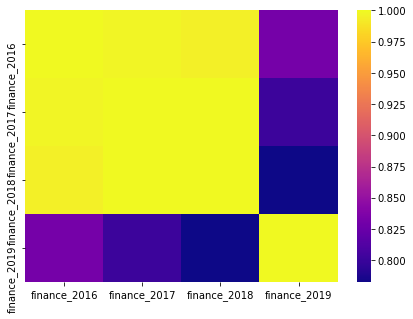

In [517]:
# Heatmap displaying the correlations between the dataset features. 
plt.figure(figsize=(7,5))
sns.heatmap(finance.corr(),cmap='plasma')

In [4]:
finance.columns

Index([  'Country Name',   'Country Code', 'Indicator Name', 'Indicator Code',
            'Attribute',             2004,             2005,             2006,
                   2007,             2008,             2009,             2010,
                   2011,             2012,             2013,             2014,
                   2015,             2016,             2017,             2018,
                   2019],
      dtype='object')

### Data Cleaning

In [5]:
finance.rename(columns={"Country Name": "country_name", "Country Code": "country_code",
                        "Indicator Code": "indicator_code", "Attribute": 'attribute', 
                        'Indicator Name': 'indicator_name'}, inplace=True)

In [6]:
finance = finance[finance.country_name != 'Anguilla']
finance = finance[finance.country_name != 'Montserrat']

In [7]:
# Handle country names
def clean_country(country):
#     country = country.lower().strip()
#     country = re.sub(r'[^a-z\s]+', '', country)
    country = 'Sao Tome and Principe' if country == 'São Tomé and Príncipe, Dem. Rep. of' else country
    country = 'San Marino, Rep. of' if country == 'San Marino' else country
    country = 'China' if country == 'China, P.R.: Mainland' else country
    country = "Cote d'Ivoire" if country == "Côte d'Ivoire" else country
    country = "Aruba" if country == 'Aruba, Kingdom of the Netherlands' else country
    country = 'Hong Kong SAR, China' if country == 'China, P.R.: Hong Kong' else country
    country = 'Macao SAR, China' if country == 'China, P.R.: Macao' else country
    country = 'Marshall Islands' if country == 'Marshall' else country
    country = 'San Marino' if country == 'San Marino, Rep. of' else country
    country = 'Comoros' if country == 'Comoros, Union of the' else country
    country = 'Timor-Leste' if country == 'Timor' else country
    country = 'Netherlands' if country == 'Netherlands, The' else country
    country = 'Venezuela, RB' if country == 'Venezuela' else country
    country = 'Micronesia, Fed. Sts.' if country == 'Micronesia, Federated States of' else country
    
    country = 'Equatorial Guinea' if country == 'Equatorial Guinea, Rep. of' else country
    country = 'Eswatini' if country == 'Eswatini, Kingdom of' else country
    country = "Lao PDR" if country == "Lao People's Dem. Rep." else country
    country = 'Lesotho' if country == 'Lesotho, Kingdom of' else country
    country = 'North Macedonia' if country == 'North Macedonia, Republic of' else country
    country = 'South Sudan' if country == 'South Sudan, Rep. of' else country


    country = re.findall(r'\w+', country)[0] if 'Rep' in country else country

    return country

finance['country_name'] = finance['country_name'].apply(lambda country: clean_country(country))

### Groupby and sum total finance operations of countries

In [9]:
finance = finance.groupby('country_name').sum().sort_values('country_name').drop(columns=
                                                                       ['country_code', 2004, 2005, 2006, 
                                                                        2007, 2008, 2009, 2010, 2011, 2012, 
                                                                        2013, 2014, 2015]).reset_index()



In [10]:
finance.columns = ['country_name', 'finance_2016', 'finance_2017', 'finance_2018', 'finance_2019']

### Checking missing values

In [11]:
finance.isnull().sum()

country_name    0
finance_2016    0
finance_2017    0
finance_2018    0
finance_2019    0
dtype: int64

In [12]:
finance

,country_name,finance_2016,finance_2017,finance_2018,finance_2019
0,Afghanistan,4.385328e+10,4.423708e+10,4.381485e+10,4.322792e+10
1,Albania,6.854292e+11,6.863350e+11,6.670025e+11,7.169868e+11
2,Algeria,7.907816e+12,8.877866e+12,9.974017e+12,1.085564e+13
3,Angola,3.619772e+12,4.224557e+12,4.912250e+12,1.036665e+14
4,Antigua and Barbuda,1.743429e+09,1.746960e+09,1.835941e+09,1.975958e+09
...,...,...,...,...,...
180,Vietnam,5.472778e+15,6.415774e+15,7.229057e+15,8.146291e+15
181,West Bank and Gaza,6.080334e+09,7.570262e+09,8.356517e+09,8.719768e+09
182,Yemen,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
183,Zambia,3.846025e+10,3.975625e+10,4.671125e+10,6.168225e+10


# Nonperforming loans

### Data loading

In [14]:
nonperforming_loans = pd.read_csv('main.csv')
nonperforming_loans = nonperforming_loans[:-19]
nonperforming_loans.head()

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Gross savings (% of GDP),NY.GNS.ICTR.ZS,..,..,..,..,..
1,Afghanistan,AFG,Real interest rate (%),FR.INR.RINR,17.5839381627209,12.1411782995744,..,..,..
2,Afghanistan,AFG,Interest rate spread (lending rate minus depos...,FR.INR.LNDP,..,..,..,..,..
3,Afghanistan,AFG,Broad money (% of GDP),FM.LBL.BMNY.GD.ZS,37.222818657719,36.8612612981975,36.607493884702,34.9592143138667,..
4,Afghanistan,AFG,Domestic credit to private sector by banks (% ...,FD.AST.PRVT.GD.ZS,3.77581257660468,3.71038110767917,3.44212677078522,3.17354549441571,..


### Data exploration

In [15]:
nonperforming_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   1519 non-null   object
 1   Country Code   1519 non-null   object
 2   Series Name    1519 non-null   object
 3   Series Code    1519 non-null   object
 4   2016 [YR2016]  1519 non-null   object
 5   2017 [YR2017]  1519 non-null   object
 6   2018 [YR2018]  1519 non-null   object
 7   2019 [YR2019]  1519 non-null   object
 8   2020 [YR2020]  1519 non-null   object
dtypes: object(9)
memory usage: 106.9+ KB


In [505]:
nonperforming_loans.corr()

,2016,2017,2018,2019,2020
2016,1.000000,0.993336,0.983044,0.973418,1.0
2017,0.993336,1.000000,0.993907,0.979860,1.0
2018,0.983044,0.993907,1.000000,0.987496,1.0
2019,0.973418,0.979860,0.987496,1.000000,1.0
2020,1.000000,1.000000,1.000000,1.000000,1.0


<AxesSubplot:>

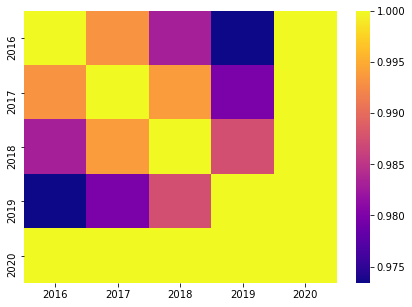

In [521]:
# Heatmap displaying the correlations between the dataset features. 
plt.figure(figsize=(7,5))
sns.heatmap(nonperforming_loans.corr(),cmap='plasma')

In [506]:
nonperforming_loans.describe()

,2016,2017,2018,2019,2020
count,1017.000000,1006.000000,954.000000,875.000000,2.000000
mean,26.915448,26.430255,26.514582,27.582144,4.094583
std,35.397621,34.773788,33.658495,35.077946,1.318165
min,-38.333180,-48.781848,-58.293975,-39.116605,3.162500
25%,6.730000,6.321667,6.448838,6.578266,3.628542
50%,13.794804,13.413766,14.444272,14.037051,4.094583
75%,33.129162,32.348594,33.874735,35.153068,4.560625
max,375.062855,396.185604,386.135263,400.406814,5.026667


### Data Cleaning

In [16]:
nonperforming_loans.columns = ['country_name', 'country_code', 'series_name', 'series_code', '2016', '2017', '2018', '2019','2020']

In [17]:
nonperforming_loans.replace('..', np.nan, inplace=True)

In [18]:
print('2016 ', nonperforming_loans['2016'].isna().sum())
print('2017 ', nonperforming_loans['2017'].isna().sum())
print('2018 ', nonperforming_loans['2018'].isna().sum())
print('2019 ', nonperforming_loans['2019'].isna().sum())
print('2020 ', nonperforming_loans['2020'].isna().sum())

2016  502
2017  513
2018  565
2019  644
2020  1517


In [19]:
years_2016_2020 = ['2016', '2017', '2018', '2019', '2020']
nonperforming_loans[years_2016_2020] = nonperforming_loans[years_2016_2020].astype('float')

In [20]:
# Handle country names
def clean_country(country):
    country = 'Korea, Dem. Rep.' if country == 'Korea, Dem. People’s Rep.' else country
    #country = re.findall(r'\w+', country)[0] if 'Rep' in country else country
    return country

nonperforming_loans['country_name'] = nonperforming_loans['country_name'].apply(lambda country: clean_country(country))

In [21]:
nonperforming_loans = nonperforming_loans[nonperforming_loans.country_name != 'St. Martin (French part)']
nonperforming_loans = nonperforming_loans[nonperforming_loans.country_name != 'Northern Mariana Islands']
nonperforming_loans = nonperforming_loans[nonperforming_loans.country_name != 'British Virgin Islands']
nonperforming_loans = nonperforming_loans[nonperforming_loans.country_name != 'American Samoa']

In [22]:
nonperforming_loans['2017'].isna().sum() / nonperforming_loans['2019'].shape[0]

0.32528504359490273

In [23]:
# nonperforming_loans.dropna(inplace=True)

### Creating  new dataframes according to features for each country

In [508]:
# DATA FEATURES

# Gross savings (% of GDP)
# Real interest rate (%)
# Interest rate spread (lending rate minus deposit rate, %)
# Broad money (% of GDP)
# Domestic credit to private sector by banks (% of GDP)
# Bank nonperforming loans to total gross loans (%)
# Bank capital to assets ratio (%)

In [24]:
serie_name1 = 'Bank nonperforming loans to total gross loans (%)'
nonperfLoan_totalLoan = nonperforming_loans[nonperforming_loans['series_name'] == serie_name1].reset_index().drop(
                        ['index', 'country_code', 'series_name', 'series_code' ,'2020'], axis=1)
nonperfLoan_totalLoan.columns = ['country_name', 'npl_total_2016', 'npl_total_2017', 'npl_total_2018', 'npl_total_2019']

In [25]:
serie_name2 = 'Gross savings (% of GDP)'
gross_savings = nonperforming_loans[nonperforming_loans['series_name'] == serie_name2].reset_index().drop(
                        ['index', 'country_code', 'series_name', 'series_code' ,'2020'], axis=1)
gross_savings.columns = ['country_name','gross_savings2016','gross_savings2017','gross_savings2018','gross_savings2019']

In [26]:
serie_name3 = 'Interest rate spread (lending rate minus deposit rate, %)'
interest_rate = nonperforming_loans[nonperforming_loans['series_name'] == serie_name3].reset_index().drop(
                        ['index', 'country_code', 'series_name', 'series_code' ,'2020'], axis=1)
interest_rate.columns = ['country_name','interest_rate_2016','interest_rate_2017','interest_rate_2018','interest_rate_2019']

In [27]:
serie_name4 = 'Broad money (% of GDP)'
broad_money = nonperforming_loans[nonperforming_loans['series_name'] == serie_name4].reset_index().drop(
                        ['index', 'country_code', 'series_name', 'series_code' ,'2020'], axis=1)
broad_money.columns = ['country_name','broad_money_2016','broad_money_2017','broad_money_2018','broad_money_2019']

In [28]:
serie_name5 = 'Domestic credit to private sector by banks (% of GDP)'
domestic_credit = nonperforming_loans[nonperforming_loans['series_name'] == serie_name5].reset_index().drop(
                        ['index', 'country_code', 'series_name', 'series_code' ,'2020'], axis=1)
domestic_credit.columns = ['country_name','domestic_credit_2016','domestic_credit_2017','domestic_credit_2018','domestic_credit_2019']

In [29]:
serie_name6 = 'Bank capital to assets ratio (%)'
capital_assests = nonperforming_loans[nonperforming_loans['series_name'] == serie_name6].reset_index().drop(
                        ['index', 'country_code', 'series_name', 'series_code' ,'2020'], axis=1)
capital_assests.columns = ['country_name','capital_assests_2016','capital_assests_2017','capital_assests_2018','capital_assests_2019']

In [30]:
serie_name7 = 'Real interest rate (%)'
real_interest_rate = nonperforming_loans[nonperforming_loans['series_name'] == serie_name2].reset_index().drop(
                        ['index', 'country_code', 'series_name', 'series_code' ,'2020'], axis=1)
real_interest_rate.columns = ['country_name','real_interest_rate_2016','real_interest_rate_2017','real_interest_rate_2018','real_interest_rate_2019']

### Merging features dataframes

In [32]:
dfs = [gross_savings, interest_rate, broad_money, domestic_credit,
       capital_assests, real_interest_rate, nonperfLoan_totalLoan]
financial_situation = gross_savings.copy()
for df in dfs:
    financial_situation = financial_situation.merge(df, on='country_name')
    
financial_situation.drop(columns=['gross_savings2016_y', 'gross_savings2017_y', 
                                  'gross_savings2018_y', 'gross_savings2016_y',
                                 'gross_savings2019_y'], axis=1, inplace=True)
financial_situation

,country_name,gross_savings2016_x,gross_savings2017_x,gross_savings2018_x,gross_savings2019_x,interest_rate_2016,interest_rate_2017,interest_rate_2018,interest_rate_2019,broad_money_2016,...,capital_assests_2018,capital_assests_2019,real_interest_rate_2016,real_interest_rate_2017,real_interest_rate_2018,real_interest_rate_2019,npl_total_2016,npl_total_2017,npl_total_2018,npl_total_2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.222819,...,11.083629,NaN,NaN,NaN,NaN,NaN,11.074379,12.201830,8.886660,NaN
1,Albania,17.053326,16.546645,16.811770,14.020517,5.903333,5.453333,5.180833,5.783333,85.804952,...,10.148724,10.452675,17.053326,16.546645,16.811770,14.020517,18.269952,13.232533,11.084582,8.368958
2,Algeria,37.380364,38.694384,40.368539,38.854237,6.250000,6.250000,6.250000,6.250000,78.884370,...,10.821636,NaN,37.380364,38.694384,40.368539,38.854237,12.089159,12.958502,12.697401,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,24.429248,23.351946,25.173194,23.322420,10.236186,9.463907,13.800347,12.879965,39.162307,...,13.323589,NaN,24.429248,23.351946,25.173194,23.322420,11.285086,25.836061,23.240506,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,West Bank and Gaza,11.477461,14.366219,15.454482,NaN,5.135016,4.398617,3.606614,3.079843,63.335216,...,10.181952,9.431945,11.477461,14.366219,15.454482,NaN,2.179018,2.317753,3.041084,4.110777
210,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,Zambia,30.440332,36.252757,41.824819,39.731433,4.715833,3.487500,2.991667,2.005833,20.623568,...,11.158240,11.090374,30.440332,36.252757,41.824819,39.731433,9.664944,11.983703,10.951198,8.907278


In [33]:
financial_situation.columns

Index(['country_name', 'gross_savings2016_x', 'gross_savings2017_x',
       'gross_savings2018_x', 'gross_savings2019_x', 'interest_rate_2016',
       'interest_rate_2017', 'interest_rate_2018', 'interest_rate_2019',
       'broad_money_2016', 'broad_money_2017', 'broad_money_2018',
       'broad_money_2019', 'domestic_credit_2016', 'domestic_credit_2017',
       'domestic_credit_2018', 'domestic_credit_2019', 'capital_assests_2016',
       'capital_assests_2017', 'capital_assests_2018', 'capital_assests_2019',
       'real_interest_rate_2016', 'real_interest_rate_2017',
       'real_interest_rate_2018', 'real_interest_rate_2019', 'npl_total_2016',
       'npl_total_2017', 'npl_total_2018', 'npl_total_2019'],
      dtype='object')

# Liquids

In [34]:
liquids = pd.read_csv('liquid.csv')
liquids = liquids[:-7]
liquids

,Series Name,Series Code,Country Name,Country Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Bank liquid reserves to bank assets ratio (%),FD.RES.LIQU.AS.ZS,Afghanistan,AFG,83.0798576558264,97.8489355243562,70.7626396343786,69.5786264163716,..
1,Bank liquid reserves to bank assets ratio (%),FD.RES.LIQU.AS.ZS,Albania,ALB,18.0510824834496,17.3672455748525,17.8285791965924,15.2155347268185,..
2,Bank liquid reserves to bank assets ratio (%),FD.RES.LIQU.AS.ZS,Algeria,DZA,17.4649017678272,23.1559036779135,22.9950972361017,17.4585468301866,..
3,Bank liquid reserves to bank assets ratio (%),FD.RES.LIQU.AS.ZS,American Samoa,ASM,..,..,..,..,..
4,Bank liquid reserves to bank assets ratio (%),FD.RES.LIQU.AS.ZS,Andorra,AND,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...
212,Bank liquid reserves to bank assets ratio (%),FD.RES.LIQU.AS.ZS,Virgin Islands (U.S.),VIR,..,..,..,..,..
213,Bank liquid reserves to bank assets ratio (%),FD.RES.LIQU.AS.ZS,West Bank and Gaza,PSE,12.804508873653,12.393142335256,11.8354776363165,12.7119048772001,..
214,Bank liquid reserves to bank assets ratio (%),FD.RES.LIQU.AS.ZS,"Yemen, Rep.",YEM,..,..,..,..,..
215,Bank liquid reserves to bank assets ratio (%),FD.RES.LIQU.AS.ZS,Zambia,ZMB,35.3584276076226,20.7550554368836,14.441583239077,18.8794635228945,..


In [35]:
liquids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    217 non-null    object
 1   Series Code    217 non-null    object
 2   Country Name   217 non-null    object
 3   Country Code   217 non-null    object
 4   2016 [YR2016]  217 non-null    object
 5   2017 [YR2017]  217 non-null    object
 6   2018 [YR2018]  217 non-null    object
 7   2019 [YR2019]  217 non-null    object
 8   2020 [YR2020]  217 non-null    object
dtypes: object(9)
memory usage: 15.4+ KB


In [510]:
liquids.describe()

,country_name,liquid_2016,liquid_2017,liquid_2018,liquid_2019
count,213,141,142,143,140
unique,213,141,142,143,140
top,Kenya,52.5121314270938,24.5781250982227,22.3060863875408,22.7865524766052
freq,1,1,1,1,1


###  Data Cleaning

In [36]:
liquids.columns = ['series_name', 'series_code', 'country_name','country_code', 
                   'liquid_2016', 'liquid_2017', 'liquid_2018', 'liquid_2019','liquid_2020']

In [37]:
liquids.drop(columns=['series_name', 'series_code', 'country_code', 'liquid_2020'], axis=1, inplace=True)

In [38]:
liquids = liquids[liquids.country_name != 'Northern Mariana Islands']
liquids = liquids[liquids.country_name != 'British Virgin Islands']
liquids = liquids[liquids.country_name != 'St. Martin (French part)']
liquids = liquids[liquids.country_name != 'American Samoa']

In [39]:
# Handle country names
def clean_country(country):
#     country = country.lower().strip()
#     country = re.sub(r'[^a-z\s]+', '', country)
    country = 'Korea, Dem. Rep.' if country == 'Korea, Dem. People’s Rep.' else country
    country = 'Curacao' if country == 'Curaçao' else country
    country = 'Sao Tome and Principe' if country == 'São Tomé and Principe' else country
    #country = re.findall(r'\w+', country)[0] if 'Rep' in country else country
    return country

liquids['country_name'] = liquids['country_name'].apply(lambda country: clean_country(country))

In [40]:
liquids.replace('..', np.nan, inplace=True)

In [41]:
liquids.reset_index()

,index,country_name,liquid_2016,liquid_2017,liquid_2018,liquid_2019
0,0,Afghanistan,83.0798576558264,97.8489355243562,70.7626396343786,69.5786264163716
1,1,Albania,18.0510824834496,17.3672455748525,17.8285791965924,15.2155347268185
2,2,Algeria,17.4649017678272,23.1559036779135,22.9950972361017,17.4585468301866
3,4,Andorra,NaN,NaN,NaN,NaN
4,5,Angola,31.2028619309189,32.1395553943672,28.206366031525,32.0452547863354
...,...,...,...,...,...,...
208,212,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
209,213,West Bank and Gaza,12.804508873653,12.393142335256,11.8354776363165,12.7119048772001
210,214,"Yemen, Rep.",NaN,NaN,NaN,NaN
211,215,Zambia,35.3584276076226,20.7550554368836,14.441583239077,18.8794635228945


# Bank z-scores

### Data Loading

In [42]:
bank_zscores = pd.read_csv('bank_z-scores.csv')
bank_zscores = bank_zscores[:-5]

### Data Cleaning

In [43]:
bank_zscores.columns = ['series_name', 'series_code', 'country_name','country_code', 'zscore_2016', 'zscore_2017']

In [44]:
bank_zscores.drop(columns=['series_name', 'series_code', 'country_code'], axis=1, inplace=True)

In [45]:
bank_zscores = bank_zscores[bank_zscores.country_name != 'Taiwan, China']

In [46]:
# Handle country names
def clean_country(country):
#     country = country.lower().strip()
#     country = re.sub(r'[^a-z\s]+', '', country)
    country = 'Curacao' if country == 'Curaçao' else country
    country = 'Sao Tome and Principe' if country == 'São Tomé and Principe' else country
    #country = re.findall(r'\w+', country)[0] if 'Rep' in country else country
    return country

bank_zscores['country_name'] = bank_zscores['country_name'].apply(lambda country: clean_country(country))

In [47]:
bank_zscores.replace('..', np.nan, inplace=True)

In [48]:
bank_zscores.reset_index()

,index,country_name,zscore_2016,zscore_2017
0,0,Afghanistan,12.6593,11.4993
1,1,Albania,17.9659,15.9563
2,2,Algeria,21.0058,21.7278
3,3,Andorra,20.9508,16.1327
4,4,Angola,9.78763,10.8368
...,...,...,...,...
208,209,Virgin Islands (U.S.),NaN,NaN
209,210,West Bank and Gaza,16.4195,15.4269
210,211,"Yemen, Rep.",12.5762,13.0811
211,212,Zambia,9.21779,9.73718


In [49]:
# checking to see different country names
print(list(set(liquids.country_name.unique()) - set(bank_zscores.country_name.unique())))
print(list(set(bank_zscores.country_name.unique()) - set(liquids.country_name.unique())))

[]
[]


# Train data

In [245]:
train_data = pd.merge(liquids, bank_zscores, on='country_name')
train_data

,country_name,liquid_2016,liquid_2017,liquid_2018,liquid_2019,zscore_2016,zscore_2017
0,Afghanistan,83.0798576558264,97.8489355243562,70.7626396343786,69.5786264163716,12.6593,11.4993
1,Albania,18.0510824834496,17.3672455748525,17.8285791965924,15.2155347268185,17.9659,15.9563
2,Algeria,17.4649017678272,23.1559036779135,22.9950972361017,17.4585468301866,21.0058,21.7278
3,Andorra,NaN,NaN,NaN,NaN,20.9508,16.1327
4,Angola,31.2028619309189,32.1395553943672,28.206366031525,32.0452547863354,9.78763,10.8368
...,...,...,...,...,...,...,...
208,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN
209,West Bank and Gaza,12.804508873653,12.393142335256,11.8354776363165,12.7119048772001,16.4195,15.4269
210,"Yemen, Rep.",NaN,NaN,NaN,NaN,12.5762,13.0811
211,Zambia,35.3584276076226,20.7550554368836,14.441583239077,18.8794635228945,9.21779,9.73718


In [246]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 212
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_name  213 non-null    object
 1   liquid_2016   141 non-null    object
 2   liquid_2017   142 non-null    object
 3   liquid_2018   143 non-null    object
 4   liquid_2019   140 non-null    object
 5   zscore_2016   182 non-null    object
 6   zscore_2017   181 non-null    object
dtypes: object(7)
memory usage: 13.3+ KB


In [52]:
train_columns = ['liquid_2016', 'liquid_2017', 'liquid_2018', 'liquid_2019', 'zscore_2016', 'zscore_2017']
train_data[train_columns] = train_data[train_columns].astype('float')

In [53]:
train_data.corr()

,liquid_2016,liquid_2017,liquid_2018,liquid_2019,zscore_2016,zscore_2017
liquid_2016,1.000000,0.943196,0.795245,0.756204,-0.029523,-0.098318
liquid_2017,0.943196,1.000000,0.925453,0.890619,-0.037376,-0.105229
liquid_2018,0.795245,0.925453,1.000000,0.950744,-0.049221,-0.099874
liquid_2019,0.756204,0.890619,0.950744,1.000000,-0.128773,-0.130783
zscore_2016,-0.029523,-0.037376,-0.049221,-0.128773,1.000000,0.936784
zscore_2017,-0.098318,-0.105229,-0.099874,-0.130783,0.936784,1.000000


In [54]:
train_data.describe()

,liquid_2016,liquid_2017,liquid_2018,liquid_2019,zscore_2016,zscore_2017
count,141.000000,142.000000,143.000000,140.000000,182.000000,181.000000
mean,22.626293,22.814348,22.249350,21.686296,14.291495,14.343602
std,27.059831,22.203489,19.671536,17.402150,8.971798,9.191909
min,0.949260,1.015501,0.667624,0.897638,1.697210,0.835310
25%,10.770985,10.093424,9.734874,9.822885,7.486537,7.520590
50%,18.255255,18.209713,17.828579,18.365950,12.741800,12.781600
75%,26.844507,27.502983,25.220726,26.289690,18.040500,18.119800
max,284.538396,190.343161,119.329266,116.900309,51.221900,57.160800


In [55]:
# Combining financial_situation and train_data

financial_train = pd.merge(financial_situation, train_data, on='country_name')


### Data Cleaning

In [56]:
# Handle country names
def clean_country(country):
    country = re.findall(r'\w+', country)[0] if 'Rep' in country else country
    return country

financial_train['country_name'] = financial_train['country_name'].apply(lambda country: clean_country(country))

In [57]:
financial_train

,country_name,gross_savings2016_x,gross_savings2017_x,gross_savings2018_x,gross_savings2019_x,interest_rate_2016,interest_rate_2017,interest_rate_2018,interest_rate_2019,broad_money_2016,...,npl_total_2016,npl_total_2017,npl_total_2018,npl_total_2019,liquid_2016,liquid_2017,liquid_2018,liquid_2019,zscore_2016,zscore_2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.222819,...,11.074379,12.201830,8.886660,NaN,83.079858,97.848936,70.762640,69.578626,12.65930,11.49930
1,Albania,17.053326,16.546645,16.811770,14.020517,5.903333,5.453333,5.180833,5.783333,85.804952,...,18.269952,13.232533,11.084582,8.368958,18.051082,17.367246,17.828579,15.215535,17.96590,15.95630
2,Algeria,37.380364,38.694384,40.368539,38.854237,6.250000,6.250000,6.250000,6.250000,78.884370,...,12.089159,12.958502,12.697401,NaN,17.464902,23.155904,22.995097,17.458547,21.00580,21.72780
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.95080,16.13270
4,Angola,24.429248,23.351946,25.173194,23.322420,10.236186,9.463907,13.800347,12.879965,39.162307,...,11.285086,25.836061,23.240506,NaN,31.202862,32.139555,28.206366,32.045255,9.78763,10.83680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,West Bank and Gaza,11.477461,14.366219,15.454482,NaN,5.135016,4.398617,3.606614,3.079843,63.335216,...,2.179018,2.317753,3.041084,4.110777,12.804509,12.393142,11.835478,12.711905,16.41950,15.42690
210,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.57620,13.08110
211,Zambia,30.440332,36.252757,41.824819,39.731433,4.715833,3.487500,2.991667,2.005833,20.623568,...,9.664944,11.983703,10.951198,8.907278,35.358428,20.755055,14.441583,18.879464,9.21779,9.73718


In [89]:
print('finance has, but not train_data\n')
print(sorted(list(set(finance.country_name.unique()) - set(financial_train.country_name.unique()))))
print('\n\n\n')
print('train_data has, but not finance\n')
print(sorted(list(set(financial_train.country_name.unique()) - set(finance.country_name.unique()))))

finance has, but not train_data

['Marshall', 'Timor', 'Venezuela']




train_data has, but not finance

['Andorra', 'Bahrain', 'Bermuda', 'Cayman Islands', 'Channel Islands', 'Cuba', 'Curacao', 'Eritrea', 'Faroe Islands', 'French Polynesia', 'Gibraltar', 'Greenland', 'Guam', 'Isle of Man', 'Liechtenstein', 'Marshall Islands', 'Monaco', 'Nauru', 'New Caledonia', 'Papua New Guinea', 'Puerto Rico', 'Sint Maarten (Dutch part)', 'Somalia', 'Timor-Leste', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Venezuela, RB', 'Virgin Islands (U.S.)']


# Main data exploration

### Data Loading

In [420]:
main = pd.merge(finance, financial_train, on='country_name')
main

,country_name,finance_2016,finance_2017,finance_2018,finance_2019,gross_savings2016_x,gross_savings2017_x,gross_savings2018_x,gross_savings2019_x,interest_rate_2016,...,npl_total_2016,npl_total_2017,npl_total_2018,npl_total_2019,liquid_2016,liquid_2017,liquid_2018,liquid_2019,zscore_2016,zscore_2017
0,Afghanistan,4.385328e+10,4.423708e+10,4.381485e+10,4.322792e+10,NaN,NaN,NaN,NaN,NaN,...,11.074379,12.201830,8.886660,NaN,83.079858,97.848936,70.762640,69.578626,12.65930,11.49930
1,Albania,6.854292e+11,6.863350e+11,6.670025e+11,7.169868e+11,17.053326,16.546645,16.811770,14.020517,5.903333,...,18.269952,13.232533,11.084582,8.368958,18.051082,17.367246,17.828579,15.215535,17.96590,15.95630
2,Algeria,7.907816e+12,8.877866e+12,9.974017e+12,1.085564e+13,37.380364,38.694384,40.368539,38.854237,6.250000,...,12.089159,12.958502,12.697401,NaN,17.464902,23.155904,22.995097,17.458547,21.00580,21.72780
3,Angola,3.619772e+12,4.224557e+12,4.912250e+12,1.036665e+14,24.429248,23.351946,25.173194,23.322420,10.236186,...,11.285086,25.836061,23.240506,NaN,31.202862,32.139555,28.206366,32.045255,9.78763,10.83680
4,Antigua and Barbuda,1.743429e+09,1.746960e+09,1.835941e+09,1.975958e+09,22.411665,17.519054,19.217786,NaN,7.647500,...,8.655527,7.938071,6.350929,5.334560,17.374760,13.411516,13.630147,14.411367,34.80030,36.52390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Vietnam,5.472778e+15,6.415774e+15,7.229057e+15,8.146291e+15,24.653205,22.185830,23.367359,23.102118,1.925000,...,2.280000,1.824981,1.804214,1.501127,NaN,NaN,NaN,NaN,13.35600,12.32680
180,West Bank and Gaza,6.080334e+09,7.570262e+09,8.356517e+09,8.719768e+09,11.477461,14.366219,15.454482,NaN,5.135016,...,2.179018,2.317753,3.041084,4.110777,12.804509,12.393142,11.835478,12.711905,16.41950,15.42690
181,Yemen,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.57620,13.08110
182,Zambia,3.846025e+10,3.975625e+10,4.671125e+10,6.168225e+10,30.440332,36.252757,41.824819,39.731433,4.715833,...,9.664944,11.983703,10.951198,8.907278,35.358428,20.755055,14.441583,18.879464,9.21779,9.73718


### Data Exploration

In [421]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_name             184 non-null    object 
 1   finance_2016             184 non-null    float64
 2   finance_2017             184 non-null    float64
 3   finance_2018             184 non-null    float64
 4   finance_2019             184 non-null    float64
 5   gross_savings2016_x      157 non-null    float64
 6   gross_savings2017_x      154 non-null    float64
 7   gross_savings2018_x      149 non-null    float64
 8   gross_savings2019_x      131 non-null    float64
 9   interest_rate_2016       123 non-null    float64
 10  interest_rate_2017       122 non-null    float64
 11  interest_rate_2018       107 non-null    float64
 12  interest_rate_2019       100 non-null    float64
 13  broad_money_2016         153 non-null    float64
 14  broad_money_2017         1

In [422]:
main.describe()

,finance_2016,finance_2017,finance_2018,finance_2019,gross_savings2016_x,gross_savings2017_x,gross_savings2018_x,gross_savings2019_x,interest_rate_2016,interest_rate_2017,...,npl_total_2016,npl_total_2017,npl_total_2018,npl_total_2019,liquid_2016,liquid_2017,liquid_2018,liquid_2019,zscore_2016,zscore_2017
count,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,157.000000,154.000000,149.000000,131.000000,123.000000,122.000000,...,135.000000,133.000000,131.000000,119.000000,139.000000,140.000000,141.000000,138.000000,172.000000,172.000000
mean,1.245746e+14,1.426558e+14,1.606261e+14,1.278980e+14,21.017891,22.124762,22.525978,22.494874,6.578861,6.572260,...,7.514339,7.590021,6.859402,6.635336,22.596314,22.750805,22.196725,21.694603,14.364953,14.596743
std,7.172527e+14,8.354611e+14,9.526540e+14,8.343808e+14,10.859080,11.673984,12.484677,11.090682,6.407667,6.362674,...,7.854269,9.115326,8.845494,9.300689,27.180783,22.310246,19.760386,17.464428,8.948150,9.264250
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-38.333180,-48.781848,-58.293975,-39.116605,-1.630000,-1.350000,...,0.195619,0.227487,0.217152,0.239743,0.949260,1.015501,0.667624,0.897638,1.697210,0.835310
25%,1.863552e+10,1.738875e+10,1.635900e+10,7.664748e+09,15.746126,15.634540,15.870778,16.428013,3.223585,3.127857,...,2.154824,2.089873,2.020237,1.964769,10.802094,9.949574,9.681282,9.959862,7.634767,7.977888
50%,3.150411e+11,3.141438e+11,3.132246e+11,1.873654e+11,21.282493,21.795698,21.694785,22.465981,5.629167,5.438325,...,4.847735,4.167788,3.583112,3.892390,18.255255,18.209713,17.828579,18.365950,12.898750,12.997700
75%,2.380589e+12,2.520675e+12,2.854111e+12,2.675135e+12,26.106813,28.078906,28.449716,27.844070,7.951667,7.999712,...,10.177712,10.046275,8.828498,7.571171,26.733415,27.434327,25.178443,26.236167,18.074675,18.350475
max,5.472778e+15,6.596400e+15,7.873300e+15,8.146291e+15,56.412466,68.392873,64.093309,55.039599,45.000000,45.000000,...,49.247933,54.541296,53.017840,61.691572,284.538396,190.343161,119.329266,116.900309,51.221900,57.160800


In [423]:
main.columns

Index(['country_name', 'finance_2016', 'finance_2017', 'finance_2018',
       'finance_2019', 'gross_savings2016_x', 'gross_savings2017_x',
       'gross_savings2018_x', 'gross_savings2019_x', 'interest_rate_2016',
       'interest_rate_2017', 'interest_rate_2018', 'interest_rate_2019',
       'broad_money_2016', 'broad_money_2017', 'broad_money_2018',
       'broad_money_2019', 'domestic_credit_2016', 'domestic_credit_2017',
       'domestic_credit_2018', 'domestic_credit_2019', 'capital_assests_2016',
       'capital_assests_2017', 'capital_assests_2018', 'capital_assests_2019',
       'real_interest_rate_2016', 'real_interest_rate_2017',
       'real_interest_rate_2018', 'real_interest_rate_2019', 'npl_total_2016',
       'npl_total_2017', 'npl_total_2018', 'npl_total_2019', 'liquid_2016',
       'liquid_2017', 'liquid_2018', 'liquid_2019', 'zscore_2016',
       'zscore_2017'],
      dtype='object')

# Data Visualization

In [532]:
main_index_country = main.set_index('country_name')

In [543]:
main_index_country

,finance_2016,finance_2017,finance_2018,finance_2019,gross_savings2016_x,gross_savings2017_x,gross_savings2018_x,gross_savings2019_x,interest_rate_2016,interest_rate_2017,...,npl_total_2016,npl_total_2017,npl_total_2018,npl_total_2019,liquid_2016,liquid_2017,liquid_2018,liquid_2019,zscore_2016,zscore_2017
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.385328e+10,4.423708e+10,4.381485e+10,4.322792e+10,NaN,22.124762,NaN,NaN,NaN,NaN,...,11.074379,12.201830,8.886660,6.635336,83.079858,97.848936,70.762640,69.578626,12.65930,11.49930
Albania,6.854292e+11,6.863350e+11,6.670025e+11,7.169868e+11,17.053326,16.546645,16.811770,14.020517,5.903333,5.453333,...,18.269952,13.232533,11.084582,8.368958,18.051082,17.367246,17.828579,15.215535,17.96590,15.95630
Algeria,7.907816e+12,8.877866e+12,9.974017e+12,1.085564e+13,37.380364,38.694384,40.368539,38.854237,6.250000,6.250000,...,12.089159,12.958502,12.697401,6.635336,17.464902,23.155904,22.995097,17.458547,21.00580,21.72780
Angola,3.619772e+12,4.224557e+12,4.912250e+12,1.036665e+14,24.429248,23.351946,25.173194,23.322420,10.236186,9.463907,...,11.285086,25.836061,23.240506,6.635336,31.202862,32.139555,28.206366,32.045255,9.78763,10.83680
Antigua and Barbuda,1.743429e+09,1.746960e+09,1.835941e+09,1.975958e+09,22.411665,17.519054,19.217786,NaN,7.647500,7.555000,...,8.655527,7.938071,6.350929,5.334560,17.374760,13.411516,13.630147,14.411367,34.80030,36.52390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,5.472778e+15,6.415774e+15,7.229057e+15,8.146291e+15,24.653205,22.185830,23.367359,23.102118,1.925000,2.258333,...,2.280000,1.824981,1.804214,1.501127,NaN,22.750805,NaN,NaN,13.35600,12.32680
West Bank and Gaza,6.080334e+09,7.570262e+09,8.356517e+09,8.719768e+09,11.477461,14.366219,15.454482,NaN,5.135016,4.398617,...,2.179018,2.317753,3.041084,4.110777,12.804509,12.393142,11.835478,12.711905,16.41950,15.42690
Yemen,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,22.124762,NaN,NaN,NaN,NaN,...,7.514339,7.590021,6.859402,6.635336,NaN,22.750805,NaN,NaN,12.57620,13.08110


In [538]:
main_index_country[main_index_country.index == 'Azerbaijan']

,finance_2016,finance_2017,finance_2018,finance_2019,gross_savings2016_x,gross_savings2017_x,gross_savings2018_x,gross_savings2019_x,interest_rate_2016,interest_rate_2017,...,npl_total_2016,npl_total_2017,npl_total_2018,npl_total_2019,liquid_2016,liquid_2017,liquid_2018,liquid_2019,zscore_2016,zscore_2017
country_name,,,,,,,,,,,,,,,,,,,,,
Azerbaijan,1.597119e+10,1.133756e+10,1.262826e+10,1.490094e+10,22.081307,28.500778,31.724672,29.224821,8.642336,8.114167,...,7.514339,7.590021,6.859402,6.635336,37.937156,30.529602,26.577829,23.408235,6.70657,10.7686


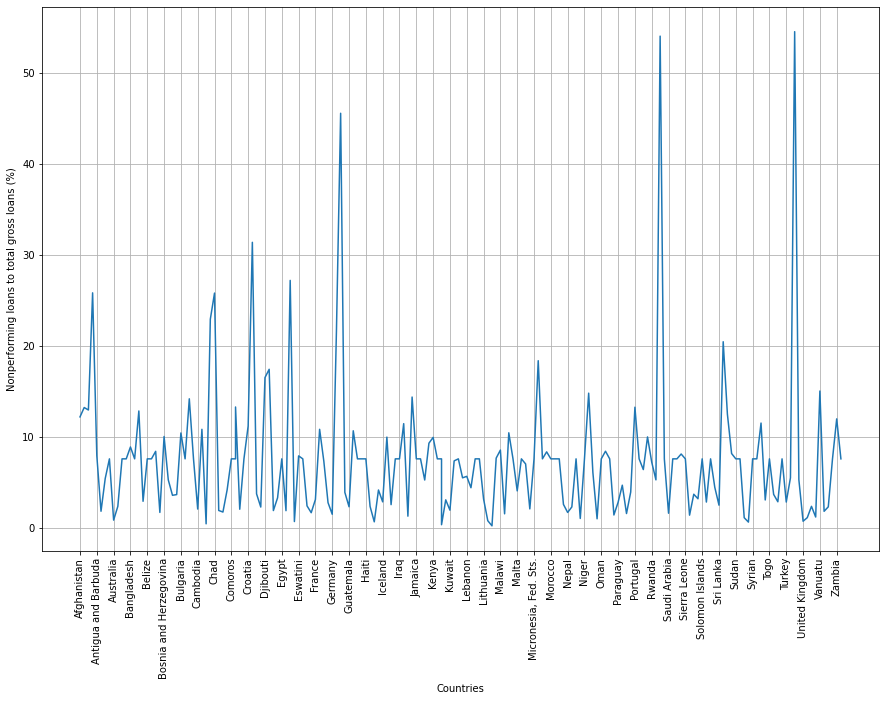

In [556]:
plt.figure(figsize=(15,10))
plt.plot(main_index_country.npl_total_2017)
plt.xticks(np.arange(0,184, step =4), rotation = 'vertical')
plt.xlabel('Countries', size=10, labelpad=5)
plt.ylabel('Nonperforming loans to total gross loans (%)', size=10, labelpad=5)
plt.grid(True)
plt.show()

# Imputing missing values

In [455]:
main.isna().sum()

country_name                0
finance_2016                0
finance_2017                0
finance_2018                0
finance_2019                0
gross_savings2016_x        27
gross_savings2017_x         0
gross_savings2018_x        35
gross_savings2019_x        53
interest_rate_2016         61
interest_rate_2017         62
interest_rate_2018         77
interest_rate_2019         84
broad_money_2016           31
broad_money_2017           33
broad_money_2018           40
broad_money_2019           51
domestic_credit_2016       11
domestic_credit_2017        0
domestic_credit_2018       17
domestic_credit_2019       24
capital_assests_2016       55
capital_assests_2017       55
capital_assests_2018       56
capital_assests_2019       69
real_interest_rate_2016    27
real_interest_rate_2017    30
real_interest_rate_2018    35
real_interest_rate_2019    53
npl_total_2016              0
npl_total_2017              0
npl_total_2018              0
npl_total_2019              0
liquid_201

In [456]:
main.npl_total_2016.fillna(np.mean(main.npl_total_2016), inplace=True)
main.npl_total_2018.fillna(np.mean(main.npl_total_2018), inplace=True)
main.npl_total_2019.fillna(np.mean(main.npl_total_2019), inplace=True)
main.finance_2017.fillna(np.median(main.finance_2017), inplace=True)
main.domestic_credit_2017.fillna(np.mean(main.domestic_credit_2017), inplace=True)
main.gross_savings2017_x.fillna(np.mean(main.gross_savings2017_x), inplace=True)
main.liquid_2017.fillna(np.mean(main.liquid_2017), inplace=True)
main.zscore_2017.fillna(np.mean(main.zscore_2017), inplace=True)

In [457]:
main.npl_total_2017.fillna(np.mean(main.npl_total_2017), inplace=True)

In [459]:
# X = main[['finance_2017', 'gross_savings2017_x', 'interest_rate_2017', 
#           'broad_money_2017', 'domestic_credit_2017', 'capital_assests_2017',
#           'real_interest_rate_2017', 'liquid_2017', 'zscore_2017']]
# y = main.npl_total_2017

# Modelling

In [460]:
X = main[['npl_total_2016', 'npl_total_2018','npl_total_2019', 'finance_2017', 'gross_savings2017_x',  'domestic_credit_2017',  'liquid_2017', 'zscore_2017']]
y = main.npl_total_2017

In [461]:
#Importing packages
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=11)

In [462]:
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [463]:
X_train.shape, X_test.shape

((138, 8), (46, 8))

In [464]:
X_test.isna().sum()

npl_total_2016          0
npl_total_2018          0
npl_total_2019          0
finance_2017            0
gross_savings2017_x     0
domestic_credit_2017    0
liquid_2017             0
zscore_2017             0
dtype: int64

# Hyperparameter tuning

In [466]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 1, 2, 3, 4],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 300],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [467]:
# # #Run only in the first run of the kernel.
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

{'colsample_bytree': 0.7,
 'gamma': 3,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [493]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        gamma = 3,
        learning_rate = 0.1,
        max_depth = 3,
        min_child_weight = 1,
        n_estimators = 200,
        subsample = 0.7)

In [494]:
# %time xgb_model.fit(X_train, y_train)

%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

pred = xgb_model.predict(X_test)

#mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

#print("MAE: ", mae_xgb)

Wall time: 51 ms


**Before hyperparameter tuning:**

    score on train set: 0.99
    score on test set: 0.78

In [495]:
xgb_model.score(X_test, y_test)

0.9181157944986363

In [496]:
xgb_model.score(X_train, y_train)

0.9809156901567238

In [497]:
mean_squared_error(y_test, pred)

5.635578968701903

**After hyperparameter tuning:**

    score on train set: 0.98
    score on test set: 0.91

In [498]:
financial_train[financial_train.country_name == 'Azerbaijan']

,country_name,gross_savings2016_x,gross_savings2017_x,gross_savings2018_x,gross_savings2019_x,interest_rate_2016,interest_rate_2017,interest_rate_2018,interest_rate_2019,broad_money_2016,...,npl_total_2016,npl_total_2017,npl_total_2018,npl_total_2019,liquid_2016,liquid_2017,liquid_2018,liquid_2019,zscore_2016,zscore_2017
11,Azerbaijan,22.081307,28.500778,31.724672,29.224821,8.642336,8.114167,7.1725,7.587049,34.571996,...,NaN,NaN,NaN,NaN,37.937156,30.529602,26.577829,23.408235,6.70657,10.7686


In [577]:
nonperfLoan_total_aze =  xgb_model.predict(X_test[X_test.index==11])
nonperfLoan_total_aze

array([7.5132685], dtype=float32)

In [587]:
print('\n\nBank nonperforming loans to total gross loans (%) of \033[1m Azerbaijan in 2017 is \033[1m {:.2f}\n\n'.
      format(nonperfLoan_total_aze[0]))



Bank nonperforming loans to total gross loans (%) of  Azerbaijan in 2017 is  7.51




**Bank Z-score = (ROA+(equity/assets))/sd(ROA)**

Return on assets (ROA) = Net Incomce / Total Assets

sd(ROA) = Standard deviation of Return on Assest